In [ ]:
#from google.colab import drive
import os

# Monter Google Drive
#drive.mount('/content/drive')

# Chemin vers le dataset
dataset_path = "/home/orlane/projet_reconnaissance/data/data/TRAIN"

# V√©rifier l'acc√®s
print("Fichiers disponibles :", os.listdir(dataset_path))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fichiers disponibles : ['TRAIN', 'TEST', 'label']


In [ ]:
!pip install mediapipe==0.10.9


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

In [ ]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # Ajouter x, y, z

    return keypoints if keypoints else [0] * 99  # 33 keypoints * 3 coordonn√©es


In [ ]:
output_csv = "/content/drive/MyDrive/yoga_pose_project/keypoints.csv"

data = []
labels = []
poses = ["Downdog", "Goddess", "Plank", "Side Plank", "Tree", "Warrior"]

for pose_name in poses:
    image_folder = os.path.join(dataset_path, "TRAIN", pose_name)

    for img_name in tqdm(os.listdir(image_folder), desc=f"Processing {pose_name}"):
        img_path = os.path.join(image_folder, img_name)
        keypoints = extract_keypoints(img_path)

        data.append(keypoints)
        labels.append(pose_name)

# Convertir en DataFrame et sauvegarder
df = pd.DataFrame(data)
df["label"] = labels
df.to_csv(output_csv, index=False)

print(f"Extraction termin√©e ! Fichier sauvegard√© : {output_csv}")


Processing Warrior: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 198/198 [00:22<00:00,  8.74it/s]


Extraction termin√©e ! Fichier sauvegard√© : /content/drive/MyDrive/yoga_pose_project/keypoints.csv


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/yoga_pose_project/keypoints.csv")
print(df.head())  # Afficher les premi√®res lignes
print(df.shape)   # V√©rifier la taille du DataFrame


          0         1         2         3         4         5         6  \
0  0.441700  0.694201 -0.096439  0.416444  0.695569 -0.137276  0.413817   
1  0.425263  0.697399  0.000949  0.406826  0.713520 -0.039265  0.404543   
2  0.375681  0.698162 -0.107649  0.355074  0.680854 -0.152594  0.354026   
3  0.572214  0.532797 -0.121105  0.556868  0.558700 -0.168262  0.554940   
4  0.415092  0.678437 -0.035257  0.389374  0.683943 -0.078691  0.385444   

          7         8         9  ...        90        91        92        93  \
0  0.691103 -0.137243  0.410937  ...  0.930634  0.812978  0.395089  0.825927   
1  0.711306 -0.039242  0.402218  ...  0.905286  0.799335  0.231913  0.818622   
2  0.676205 -0.152598  0.353057  ...  0.891064  0.858807  0.424301  0.770906   
3  0.558721 -0.168215  0.553211  ...  0.610354  0.671845  0.264880  0.765417   
4  0.680806 -0.078703  0.381415  ...  0.931942  0.766531  0.479230  0.833564   

         94        95        96        97        98    label  
0  0.

In [ ]:
import pandas as pd

# Charger les keypoints extraits
df = pd.read_csv("/content/drive/MyDrive/yoga_pose_project/keypoints.csv")

# Afficher les 5 premi√®res lignes pour v√©rifier le format
print(df.head())

# V√©rifier la taille du dataset
print(f"Taille du dataset : {df.shape}")

# V√©rifier s'il y a des valeurs manquantes
print(df.isnull().sum())


          0         1         2         3         4         5         6  \
0  0.441700  0.694201 -0.096439  0.416444  0.695569 -0.137276  0.413817   
1  0.425263  0.697399  0.000949  0.406826  0.713520 -0.039265  0.404543   
2  0.375681  0.698162 -0.107649  0.355074  0.680854 -0.152594  0.354026   
3  0.572214  0.532797 -0.121105  0.556868  0.558700 -0.168262  0.554940   
4  0.415092  0.678437 -0.035257  0.389374  0.683943 -0.078691  0.385444   

          7         8         9  ...        90        91        92        93  \
0  0.691103 -0.137243  0.410937  ...  0.930634  0.812978  0.395089  0.825927   
1  0.711306 -0.039242  0.402218  ...  0.905286  0.799335  0.231913  0.818622   
2  0.676205 -0.152598  0.353057  ...  0.891064  0.858807  0.424301  0.770906   
3  0.558721 -0.168215  0.553211  ...  0.610354  0.671845  0.264880  0.765417   
4  0.680806 -0.078703  0.381415  ...  0.931942  0.766531  0.479230  0.833564   

         94        95        96        97        98    label  
0  0.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Supprimer les lignes avec des valeurs manquantes
df.dropna(inplace=True)

# S√©parer features (X) et labels (y)
X = df.iloc[:, :-1].values  # Toutes les colonnes sauf la derni√®re
y = df.iloc[:, -1].values   # La colonne des labels

# Normalisation des coordonn√©es des keypoints
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("‚úÖ Donn√©es nettoy√©es et normalis√©es !")


‚úÖ Donn√©es nettoy√©es et normalis√©es !


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Encoder les labels (ex: "Downdog" -> 0, "Goddess" -> 1, ...)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Sauvegarder l'encodeur pour l'utiliser plus tard
with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print(f"‚úÖ Labels encod√©s : {encoder.classes_}")


‚úÖ Labels encod√©s : ['Downdog' 'Goddess' 'Plank' 'Side Plank' 'Tree' 'Warrior']


In [ ]:
from sklearn.model_selection import train_test_split

# Diviser en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train : {X_train.shape}, Test : {X_test.shape}")


Train : (601, 99), Test : (151, 99)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Reshape des donn√©es pour LSTM (601, 99) ‚Üí (601, 33, 3)  (33 keypoints avec (x, y, z))
X_train_reshaped = X_train.reshape((X_train.shape[0], 33, 3))
X_test_reshaped = X_test.reshape((X_test.shape[0], 33, 3))

# D√©finition du mod√®le am√©lior√© (LSTM plus profond + MLP)
model = models.Sequential([
    # Premi√®re couche LSTM
    layers.LSTM(256, return_sequences=True, input_shape=(33, 3), kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Deuxi√®me couche LSTM
    layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Troisi√®me couche LSTM
    layers.LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Couche dense pour classifier
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Sortie avec softmax (classification)
    layers.Dense(len(encoder.classes_), activation='softmax')
])

# Compilation du mod√®le
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entra√Ænement du mod√®le
history = model.fit(X_train_reshaped, y_train,
                    epochs=200,  # Augmentation du nombre d‚Äô√©poques
                    batch_size=16,
                    validation_data=(X_test_reshaped, y_test))

# Sauvegarde du mod√®le
model.save("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_deep_lstm.h5")

print("‚úÖ Mod√®le LSTM profond entra√Æn√© et sauvegard√© !")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 172ms/step - accuracy: 0.2116 - loss: 11.1536 - val_accuracy: 0.2119 - val_loss: 10.5333
Epoch 2/200
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 198ms/step - accuracy: 0.3233 - loss: 10.7620 - val_accuracy: 0.2848 - val_loss: 10.5111
Epoch 3/200
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 146ms/step - accuracy: 0.3490 - loss: 10.3665 - val_accuracy: 0.3510 - val_loss: 10.3908
Epoch 4/200
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 144ms/step - accuracy: 0.4053 - loss: 10.0690 - val_accuracy: 0.3113 - val_loss: 10.1800
Epoch 5/200
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 142ms/step - accuracy: 0.4671 - loss: 9.8495 - val_accuracy: 0.3444 - val_loss: 9.8838
Epoch 6/200
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 162ms/step - accuracy: 0.5099 - loss: 9.7068 - val_accuracy:

‚úÖ Mod√®le LSTM profond entra√Æn√© et sauvegard√© !


In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Charger les donn√©es
df = pd.read_csv("/content/drive/MyDrive/yoga_pose_project/keypoints.csv")

# S√©parer les keypoints (X) et labels (y)
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Labels

# Normalisation des keypoints
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encodage des labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Sauvegarde du scaler et de l'encodeur
with open("/content/drive/MyDrive/yoga_pose_project/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print("‚úÖ Scaler et encodeur sauvegard√©s avec succ√®s !")


‚úÖ Scaler et encodeur sauvegard√©s avec succ√®s !


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle

# Charger le mod√®le
model = tf.keras.models.load_model("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/content/drive/MyDrive/yoga_pose_project/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialisation de MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # x, y, z (normalis√©s)

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_pose(image_path):
    """Pr√©dit la pose de yoga √† partir d'une image"""
    keypoints = extract_keypoints(image_path)

    if keypoints:
        keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le mod√®le
        keypoints = scaler.transform(keypoints)  # Normalisation
        keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

        # Pr√©dire la classe
        pred = model.predict(keypoints)
        predicted_class = encoder.inverse_transform([pred.argmax()])[0]

        print(f"üßò‚Äç‚ôÇÔ∏è Pose pr√©dite : {predicted_class}")
    else:
        print("‚ùå Impossible de d√©tecter les keypoints.")

# üîπ Test sur une image sp√©cifique
image_path = "/content/drive/MyDrive/yoga_pose_project/data/TEST/Side Plank/00000015.jpg"
predict_pose(image_path)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 876ms/step
üßò‚Äç‚ôÇÔ∏è Pose pr√©dite : Side Plank


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle
import os

# Charger le mod√®le
model = tf.keras.models.load_model("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/content/drive/MyDrive/yoga_pose_project/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialisation de MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # x, y, z (normalis√©s)

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_poses_from_folder(folder_path):
    """Pr√©dit les poses pour toutes les images d'un dossier"""
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print("‚ùå Aucun fichier image trouv√© dans le dossier.")
        return

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        keypoints = extract_keypoints(image_path)

        if keypoints:
            keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le mod√®le
            keypoints = scaler.transform(keypoints)  # Normalisation
            keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

            # Pr√©dire la classe
            pred = model.predict(keypoints)
            predicted_class = encoder.inverse_transform([pred.argmax()])[0]

            print(f"‚úÖ {image_file} ‚Üí Pose pr√©dite : {predicted_class}")
        else:
            print(f"‚ùå {image_file} ‚Üí Impossible de d√©tecter les keypoints.")

# üîπ Test sur un dossier contenant plusieurs images
folder_path = "/content/drive/MyDrive/yoga_pose_project/data/TEST/Plank"
predict_poses_from_folder(folder_path)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 561ms/step
‚úÖ 00000002.jpg ‚Üí Pose pr√©dite : Plank
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step
‚úÖ 00000005.jpg ‚Üí Pose pr√©dite : Plank
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
‚úÖ 00000001.jpg ‚Üí Pose pr√©dite : Plank
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
‚úÖ 00000000.jpg ‚Üí Pose pr√©dite : Plank
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
‚úÖ 00000011.jpg ‚Üí Pose pr√©dite : Plank
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
‚úÖ 00000010.jpg ‚Üí Pose pr√©dite : Plank
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step
‚úÖ 00000007.jpg ‚Üí Pose pr√©dite : Plank
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
‚úÖ 00000012.jpg ‚Üí Pose pr√©dite : Plank
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle
import os
import random

# Charger le mod√®le
model = tf.keras.models.load_model("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/content/drive/MyDrive/yoga_pose_project/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialisation de MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # x, y, z (normalis√©s)

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_poses_from_random_folder(test_root):
    """S√©lectionne un dossier al√©atoire de pose et pr√©dit les poses sur ses images"""
    pose_folders = [f for f in os.listdir(test_root) if os.path.isdir(os.path.join(test_root, f))]

    if not pose_folders:
        print("‚ùå Aucun dossier de pose trouv√© dans le dossier TEST.")
        return

    # Choix al√©atoire d'un dossier de pose
    selected_pose = random.choice(pose_folders)
    selected_folder = os.path.join(test_root, selected_pose)

    print(f"üìÇ Dossier s√©lectionn√© al√©atoirement : {selected_pose}")

    # Liste des images dans le dossier choisi
    image_files = [f for f in os.listdir(selected_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print("‚ùå Aucun fichier image trouv√© dans le dossier s√©lectionn√©.")
        return

    for image_file in image_files:
        image_path = os.path.join(selected_folder, image_file)
        keypoints = extract_keypoints(image_path)

        if keypoints:
            keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le mod√®le
            keypoints = scaler.transform(keypoints)  # Normalisation
            keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

            # Pr√©dire la classe
            pred = model.predict(keypoints)
            predicted_class = encoder.inverse_transform([pred.argmax()])[0]

            print(f"‚úÖ {image_file} ‚Üí Pose pr√©dite : {predicted_class}")
        else:
            print(f"‚ùå {image_file} ‚Üí Impossible de d√©tecter les keypoints.")

# üîπ Test sur un dossier choisi al√©atoirement dans le dossier TEST
test_root = "/content/drive/MyDrive/yoga_pose_project/data/TEST"
predict_poses_from_random_folder(test_root)


üìÇ Dossier s√©lectionn√© al√©atoirement : Warrior
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 442ms/step
‚úÖ 00000000.jpg ‚Üí Pose pr√©dite : Warrior
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
‚úÖ 00000004.jpg ‚Üí Pose pr√©dite : Warrior
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
‚úÖ 00000001.jpg ‚Üí Pose pr√©dite : Warrior
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
‚úÖ 00000005.jpg ‚Üí Pose pr√©dite : Warrior
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
‚úÖ 00000003.jpg ‚Üí Pose pr√©dite : Warrior
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
‚úÖ 00000002.jpg ‚Üí Pose pr√©dite : Warrior
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step
‚úÖ 00000013.jpg ‚Üí Pose pr√©dite : Warrior
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 60ms/step
‚úÖ 0000

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle

# Charger le mod√®le entra√Æn√©
model = tf.keras.models.load_model("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/content/drive/MyDrive/yoga_pose_project/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/content/drive/MyDrive/yoga_pose_project/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialiser MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)

    if image is None:
        print(f"‚ùå Impossible de charger l'image : {image_path}")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # Normalis√© entre 0 et 1

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_pose(image_path):
    """Pr√©dit la pose de yoga d'une image externe"""
    keypoints = extract_keypoints(image_path)

    if keypoints:
        keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le mod√®le
        keypoints = scaler.transform(keypoints)  # Normalisation
        keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

        # Pr√©dire la classe
        pred = model.predict(keypoints)
        predicted_class = encoder.inverse_transform([pred.argmax()])[0]

        print(f"üßò‚Äç‚ôÇÔ∏è Pose pr√©dite : {predicted_class}")
    else:
        print("‚ùå Aucune keypoint d√©tect√©e. V√©rifie l‚Äôimage.")

# üîπ Modifier ce chemin pour une image externe (pas dans le dataset)
image_path = "/content/drive/MyDrive/test.jpg"

# Ex√©cuter la pr√©diction
predict_pose(image_path)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 439ms/step
üßò‚Äç‚ôÇÔ∏è Pose pr√©dite : Downdog


In [ ]:
import matplotlib.pyplot as plt

def predict_pose(image_path):
    """Pr√©dit la pose de yoga d'une image externe et affiche l'image avec les keypoints"""
    image = cv2.imread(image_path)

    if image is None:
        print(f"‚ùå Impossible de charger l'image : {image_path}")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # 33 keypoints * 3

        # Pr√©paration des keypoints pour pr√©diction
        keypoints_np = np.array(keypoints).reshape(1, -1)
        keypoints_np = scaler.transform(keypoints_np)
        keypoints_np = keypoints_np.reshape(1, 33, 3)

        # Pr√©diction
        pred = model.predict(keypoints_np)
        predicted_class = encoder.inverse_transform([pred.argmax()])[0]

        # Afficher la classe sur l'image
        cv2.putText(image, f"Pose: {predicted_class}", (30, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Dessiner les keypoints
        mp.solutions.drawing_utils.draw_landmarks(
            image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Afficher l'image avec matplotlib (convertie en RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"üßò‚Äç‚ôÇÔ∏è Pose pr√©dite : {predicted_class}")
        plt.show()

    else:
        print("‚ùå Aucune keypoint d√©tect√©e. V√©rifie l‚Äôimage.")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129496 (\N{PERSON IN LOTUS POSITION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


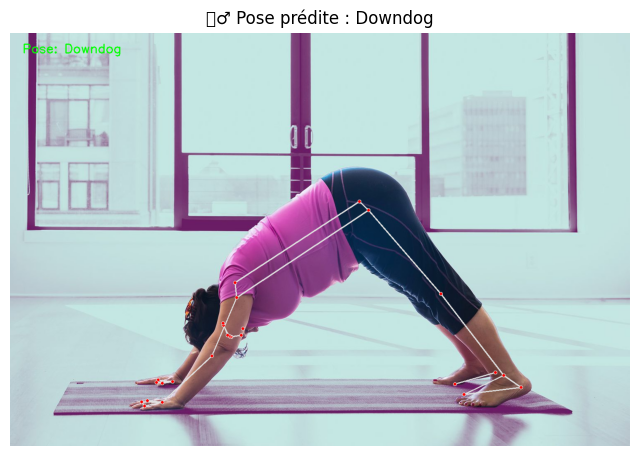

In [ ]:
image_path = "/content/drive/MyDrive/test.jpg"
predict_pose(image_path)


5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step
üìä Rapport de classification :
              precision    recall  f1-score   support

     Downdog       0.97      1.00      0.99        36
     Goddess       0.86      1.00      0.93        19
       Plank       1.00      0.94      0.97        17
  Side Plank       0.95      0.95      0.95        21
        Tree       1.00      0.95      0.97        20
     Warrior       0.94      0.89      0.92        38

    accuracy                           0.95       151
   macro avg       0.96      0.96      0.95       151
weighted avg       0.96      0.95      0.95       151



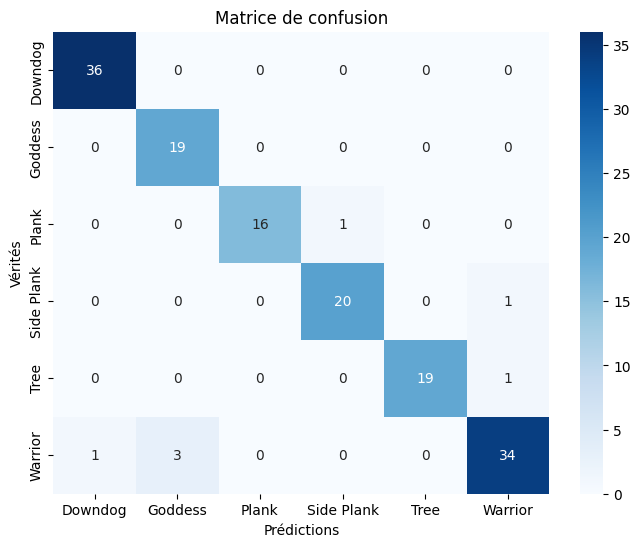

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Pr√©dictions sur le jeu de test
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Rapport de classification
print("üìä Rapport de classification :")
print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.title("Matrice de confusion")
plt.show()


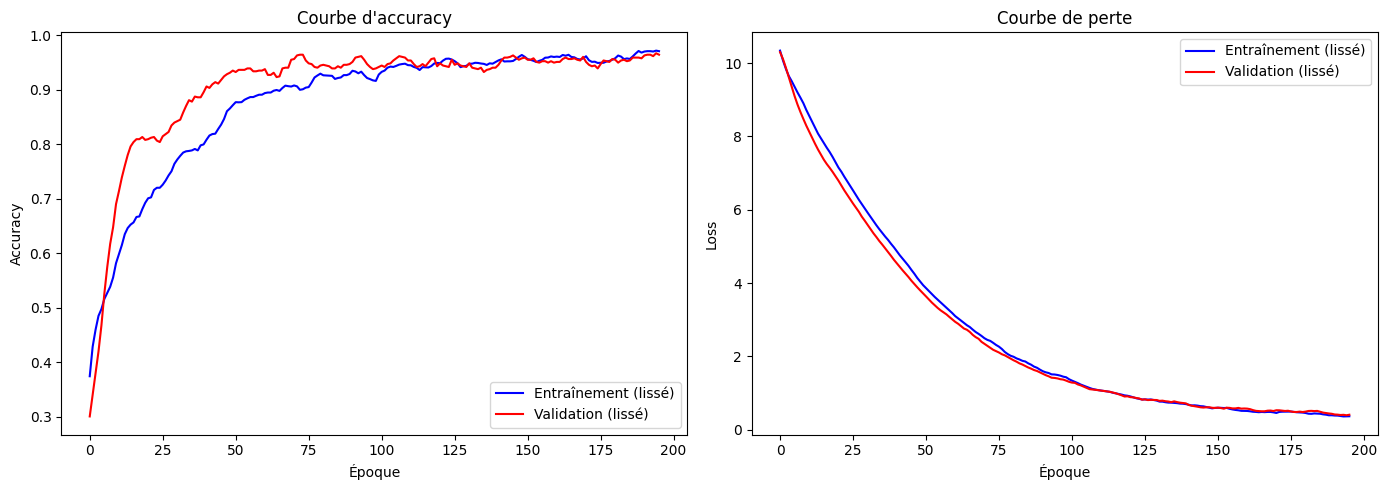

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que ton objet "history" contient l'historique de l'entra√Ænement
# Exemple : history = model.fit(...)

# 1. Extraire les courbes depuis l'objet history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 2. Fonction pour moyenne mobile
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# 3. Appliquer le lissage
window = 5  # Tu peux ajuster ce param√®tre
train_acc_smooth = moving_average(train_acc, window)
val_acc_smooth = moving_average(val_acc, window)
train_loss_smooth = moving_average(train_loss, window)
val_loss_smooth = moving_average(val_loss, window)

# 4. Plot courbes liss√©es
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_acc_smooth, label="Entra√Ænement (liss√©)", color='blue')
plt.plot(val_acc_smooth, label="Validation (liss√©)", color='red')
plt.xlabel("√âpoque")
plt.ylabel("Accuracy")
plt.title("Courbe d'accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_smooth, label="Entra√Ænement (liss√©)", color='blue')
plt.plot(val_loss_smooth, label="Validation (liss√©)", color='red')
plt.xlabel("√âpoque")
plt.ylabel("Loss")
plt.title("Courbe de perte")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# üìÇ Modifier ici pour tester une autre image !
image_path = "/content/drive/MyDrive/test.jpg"

predict_pose(image_path)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step
üßò‚Äç‚ôÇÔ∏è Pose pr√©dite : Downdog


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import tensorflow as tf  # si tu utilises Keras

# Charger ton mod√®le de classification (ajuste le chemin)
model = tf.keras.models.load_model('/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_deep_lstm.h5')
class_names = ['Warrior', 'Tree', 'Downwdog', 'Plank', 'Side Plank', 'Goddess']  # √Ä adapter selon ton dataset

def extract_keypoints(results):
    # On extrait les coordonn√©es x, y, z + visibilit√© pour chaque landmark
    if not results.pose_landmarks:
        return np.zeros(132)  # 33 points * 4 (x, y, z, visibility)
    landmarks = results.pose_landmarks.landmark
    keypoints = np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in landmarks]).flatten()
    return keypoints

def predict_pose(image_path):
    # Chargement de l'image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # MediaPipe Pose
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True)
    mp_drawing = mp.solutions.drawing_utils

    # Pr√©diction keypoints
    results = pose.process(image_rgb)

    # Dessin des keypoints
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS
        )

    # Extraction + pr√©diction classe de la pose
    keypoints = extract_keypoints(results).reshape(1, -1)
    prediction = model.predict(keypoints)
    predicted_class = class_names[np.argmax(prediction)]

    # Affichage
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Pose pr√©dite : {predicted_class}")
    plt.show()
